In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
# read the Houses dataset CSV file
housing_data = pd.read_csv("./real_estate.csv", sep=",")
housing_data.head()

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale


In [14]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


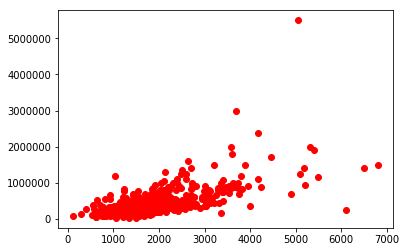

In [15]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [16]:
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [17]:
# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

In [18]:
# shuffle the dataset before separating test/train sets
p = np.random.permutation(len(Xs))
Xs = Xs[p]
Ys = Ys[p]

In [19]:
# separate train/test sets 
# Use 80% for training and 20% for testing
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0, 0.5, 'Price')

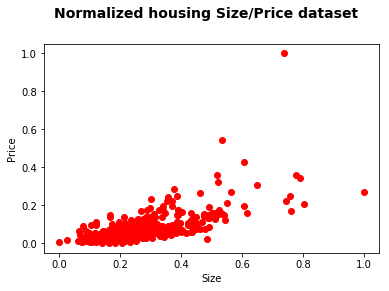

In [20]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [21]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [23]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.asarray(np.random.normal(loc=0, scale=0.02)) # Slope of the line
W1 = W1.reshape((1))

In [24]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        x_batch = Xs[i:i+batch_size]
        if x_batch.shape[0] < batch_size:
            continue
        yield np.reshape(x_batch, (batch_size,-1)), Ys[i:i+batch_size]

In [25]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    plt.show()

In [26]:
# defines the size of the step we want to perform in the direction of the gradient
step_size = 0.1

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

validation_err_list = []
training_err_list = []
batch_size = 96
total_epochs = 150

In [27]:
def mean_squared_error(Ys_batch, Y_pred):
    return np.mean((Ys_batch-Y_pred)**2)

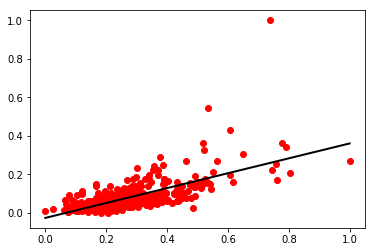

Epoch: 0 Validation err: 0.00180890219477744
Epoch: 1 Validation err: 0.001784943818115007
Epoch: 2 Validation err: 0.0017743602689681381
Epoch: 3 Validation err: 0.0018159567036326045
Epoch: 4 Validation err: 0.0018072183069157543
Epoch: 5 Validation err: 0.0017681004829673851
Epoch: 6 Validation err: 0.0017831206958437698
Epoch: 7 Validation err: 0.0017810541055237874
Epoch: 8 Validation err: 0.0017958641301663145
Epoch: 9 Validation err: 0.0017829672086752534
Epoch: 10 Validation err: 0.0017866820767344193
Epoch: 11 Validation err: 0.0017990249541637927
Epoch: 12 Validation err: 0.001782280964406151
Epoch: 13 Validation err: 0.0017903262185832965
Epoch: 14 Validation err: 0.0018254757793779238
Epoch: 15 Validation err: 0.0017938790051847196
Epoch: 16 Validation err: 0.001794102626530221
Epoch: 17 Validation err: 0.0017981151060906988
Epoch: 18 Validation err: 0.0018017944108313668
Epoch: 19 Validation err: 0.0017995927506429632


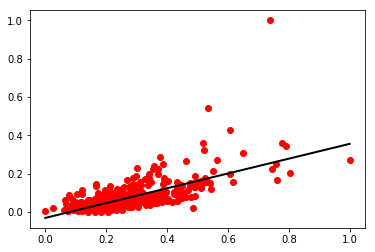

Epoch: 20 Validation err: 0.001752515504974814
Epoch: 21 Validation err: 0.0017527363363656154
Epoch: 22 Validation err: 0.00176820226712554
Epoch: 23 Validation err: 0.0017801912620529687
Epoch: 24 Validation err: 0.0018092308892394334
Epoch: 25 Validation err: 0.0017807809439471687
Epoch: 26 Validation err: 0.0017799779557688125
Epoch: 27 Validation err: 0.0018070331431244814
Epoch: 28 Validation err: 0.0018166728791581337
Epoch: 29 Validation err: 0.0017840657238864374
Epoch: 30 Validation err: 0.001784063483187614
Epoch: 31 Validation err: 0.001798847494356723
Epoch: 32 Validation err: 0.0017984333100469533
Epoch: 33 Validation err: 0.0017738135461171393
Epoch: 34 Validation err: 0.001776758936148146
Epoch: 35 Validation err: 0.0017840202097355476
Epoch: 36 Validation err: 0.0017710452592552012
Epoch: 37 Validation err: 0.0017879904517408554
Epoch: 38 Validation err: 0.0017904848050967139
Epoch: 39 Validation err: 0.0017757471761341442


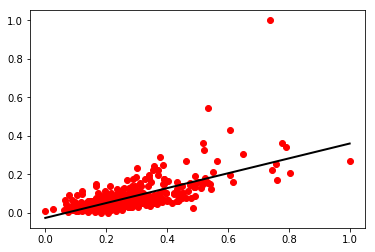

Epoch: 40 Validation err: 0.0018001999620282524
Epoch: 41 Validation err: 0.0017988311907926517
Epoch: 42 Validation err: 0.0017901623456683029
Epoch: 43 Validation err: 0.001767545970568091
Epoch: 44 Validation err: 0.0017898792407588194
Epoch: 45 Validation err: 0.0017979918046647024
Epoch: 46 Validation err: 0.0017670867266099059
Epoch: 47 Validation err: 0.001783910580914762
Epoch: 48 Validation err: 0.0017829249608436544
Epoch: 49 Validation err: 0.001811702877310245
Epoch: 50 Validation err: 0.0017985516301879305
Epoch: 51 Validation err: 0.00176699294854514
Epoch: 52 Validation err: 0.001807407079383248
Epoch: 53 Validation err: 0.0018012214994756162
Epoch: 54 Validation err: 0.001779916775423872
Epoch: 55 Validation err: 0.0017766716819544006
Epoch: 56 Validation err: 0.001801684140322221
Epoch: 57 Validation err: 0.0018183058887385635
Epoch: 58 Validation err: 0.0017974099084215424
Epoch: 59 Validation err: 0.0017771475554194307


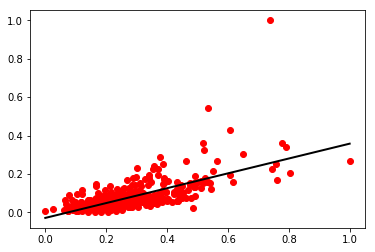

Epoch: 60 Validation err: 0.0017757092843158982
Epoch: 61 Validation err: 0.0018142391231358794
Epoch: 62 Validation err: 0.0017905286689248246
Epoch: 63 Validation err: 0.0018027286743241143
Epoch: 64 Validation err: 0.00179995066756498
Epoch: 65 Validation err: 0.0017931957936500296
Epoch: 66 Validation err: 0.0018001310776544726
Epoch: 67 Validation err: 0.001815601758176843
Epoch: 68 Validation err: 0.0018048075946929987
Epoch: 69 Validation err: 0.0017974394216935224
Epoch: 70 Validation err: 0.001795395240912123
Epoch: 71 Validation err: 0.001782616628089051
Epoch: 72 Validation err: 0.0018080501855282692
Epoch: 73 Validation err: 0.001810222251113687
Epoch: 74 Validation err: 0.0017924975536962415
Epoch: 75 Validation err: 0.0018127130019534785
Epoch: 76 Validation err: 0.0018164183524955304
Epoch: 77 Validation err: 0.0017916246909253429
Epoch: 78 Validation err: 0.001789412565730802
Epoch: 79 Validation err: 0.0017972288865606837


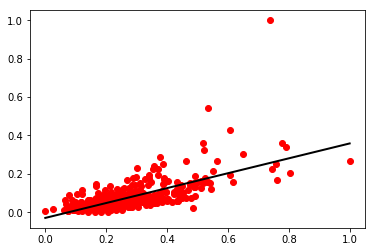

Epoch: 80 Validation err: 0.001781650235756487
Epoch: 81 Validation err: 0.0017996861894333108
Epoch: 82 Validation err: 0.0018329121377083678
Epoch: 83 Validation err: 0.0018109537841139737
Epoch: 84 Validation err: 0.001796567046613448
Epoch: 85 Validation err: 0.0018050647653072255
Epoch: 86 Validation err: 0.001807487158202944
Epoch: 87 Validation err: 0.0017904827136929768
Epoch: 88 Validation err: 0.0017886932918140005
Epoch: 89 Validation err: 0.001818908965920266
Epoch: 90 Validation err: 0.001782809288756759
Epoch: 91 Validation err: 0.0018062567803630149
Epoch: 92 Validation err: 0.0018059089660663558
Epoch: 93 Validation err: 0.0018342726727146937
Epoch: 94 Validation err: 0.0018010210814886423
Epoch: 95 Validation err: 0.001799456993166585
Epoch: 96 Validation err: 0.0018157044568366594
Epoch: 97 Validation err: 0.0018127205410467702
Epoch: 98 Validation err: 0.0018201596154185497
Epoch: 99 Validation err: 0.001842709125044245


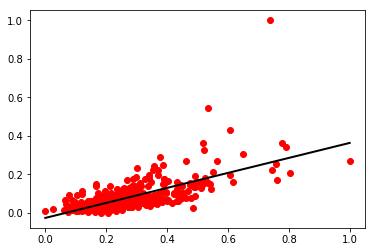

Epoch: 100 Validation err: 0.0018343587268588486
Epoch: 101 Validation err: 0.001808244223225065
Epoch: 102 Validation err: 0.0018124238846221124
Epoch: 103 Validation err: 0.0018011488255224577
Epoch: 104 Validation err: 0.0017852562460178364
Epoch: 105 Validation err: 0.001786590240933083
Epoch: 106 Validation err: 0.0017854127891093398
Epoch: 107 Validation err: 0.0018033598432487794
Epoch: 108 Validation err: 0.001791106104980586
Epoch: 109 Validation err: 0.0018073405542330624
Epoch: 110 Validation err: 0.0018099578435628386
Epoch: 111 Validation err: 0.0018132665052873185
Epoch: 112 Validation err: 0.0018147846090077935
Epoch: 113 Validation err: 0.0018118710942093324
Epoch: 114 Validation err: 0.0018071033827502454
Epoch: 115 Validation err: 0.0017876743426915754
Epoch: 116 Validation err: 0.0017871806211089598
Epoch: 117 Validation err: 0.0018182086622699457
Epoch: 118 Validation err: 0.0017996818909062895
Epoch: 119 Validation err: 0.0018218250710945378


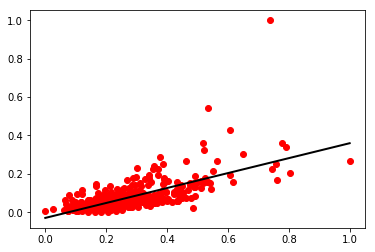

Epoch: 120 Validation err: 0.001795958445604386
Epoch: 121 Validation err: 0.0018103619477219818
Epoch: 122 Validation err: 0.0018394281393895944
Epoch: 123 Validation err: 0.0018247202323452354
Epoch: 124 Validation err: 0.0017996731989542258
Epoch: 125 Validation err: 0.0018093741675399265
Epoch: 126 Validation err: 0.0017939060855309689
Epoch: 127 Validation err: 0.0018054821444196212
Epoch: 128 Validation err: 0.0018128513368124476
Epoch: 129 Validation err: 0.0018174025608836727
Epoch: 130 Validation err: 0.0018328760255125272
Epoch: 131 Validation err: 0.0018193971197170396
Epoch: 132 Validation err: 0.0018206468039604624
Epoch: 133 Validation err: 0.0018723065814396497
Epoch: 134 Validation err: 0.0018222404338805427
Epoch: 135 Validation err: 0.001809005167354306
Epoch: 136 Validation err: 0.0018256705202575035
Epoch: 137 Validation err: 0.0018431255389147157
Epoch: 138 Validation err: 0.0018254154225992557
Epoch: 139 Validation err: 0.0018097704526525728


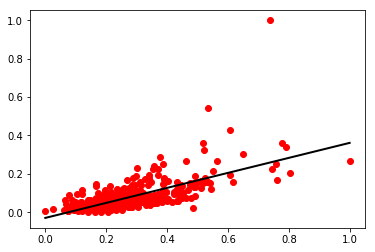

Epoch: 140 Validation err: 0.001808326156529083
Epoch: 141 Validation err: 0.0018327534781405323
Epoch: 142 Validation err: 0.001830778028607694
Epoch: 143 Validation err: 0.0018427059391969162
Epoch: 144 Validation err: 0.0018311963927842095
Epoch: 145 Validation err: 0.0018540741664078676
Epoch: 146 Validation err: 0.0018375245883438618
Epoch: 147 Validation err: 0.0018117803758251306
Epoch: 148 Validation err: 0.0018363939812564801
Epoch: 149 Validation err: 0.0018191591319756122


In [31]:
for epoch in range(total_epochs):
    errors = []
    for X_batch, y_batch in next_batch(Xs_train, Ys_train, batch_size=batch_size):

        # linearly combine input and weights
        train_pred = W0 + np.dot(X_batch, W1)
    
        # calculate the SSE between predicted and true values
        train_err = mean_squared_error(y_batch, train_pred)
        errors.append(train_err)
        
        # calculate the gradients with respect to W0 and W1
        DW0 = -(2/batch_size) * sum(y_batch.squeeze() - train_pred.squeeze())
        DW1 = -(2/batch_size) * sum(X_batch.squeeze() * (y_batch.squeeze() - train_pred.squeeze()))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 - step_size * DW0
        W1 = W1 - step_size * DW1
    
    if epoch % 20 == 0: 
        eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    training_err_list.append(np.mean(errors))
    
    # test in the end of epoch
    val_pred = W0 + np.dot(np.reshape(Xs_test, (-1,1)), W1)
    val_err = mean_squared_error(Ys_test, val_pred)
    print("Epoch:", epoch, "Validation err:", val_err)
    validation_err_list.append(val_err)
    
    #epoch += 1
    if val_err < best_hypothesis:
        best_hypothesis = val_err
        W0_hat = W0
        W1_hat = W1

Text(0, 0.5, 'Error')

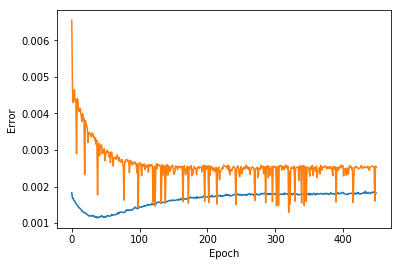

In [32]:
# plot the price and the size
plt.plot(validation_err_list, label="validation")
plt.plot(training_err_list, label="training")
plt.xlabel('Epoch')
plt.ylabel('Error')